# <u> Online Shoppers Purchasing Intention </u>

_The dataset consists of feature vectors belonging to 12,330 sessions of users on an e-commerce website with information whether they resulted in shopping. Several factors and other details of the session are also mentioned. We have to build a model to predict whether a session will result in shopping based on these factors and also perform some analysis on how these factors influence our result._

### Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats
import statsmodels.api as smp

### Importing the dataset

In [2]:
raw_data = pd.read_csv("C://Users//Apoorv//Downloads//Learning//Projects//online_shoppers_intention.csv")
raw_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
raw_data.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<AxesSubplot:>

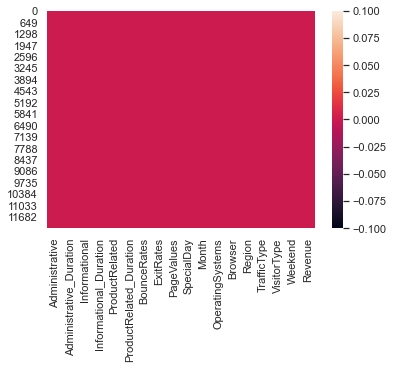

In [5]:
sns.heatmap(raw_data.isnull())
# Clearly, there are no missing values.

In [6]:
data_raw = raw_data.copy()

__raw_cat = raw_data[['VisitorType', 'Month', 'Weekend', 'Revenue']]__ <br>
These are our four categorical variables. Since,'Weekend' and 'Revenue' are Boolean values, we'll OneHot encode them and obtain dummies for the rest.

### Checking for Multicollinearity

Multicollinearity corresponds to a situation where the data contain highly correlated independent variables. This is a problem because it reduces the precision of the estimated coefficients, which weakens the statistical power of the logistic regression model.

<AxesSubplot:>

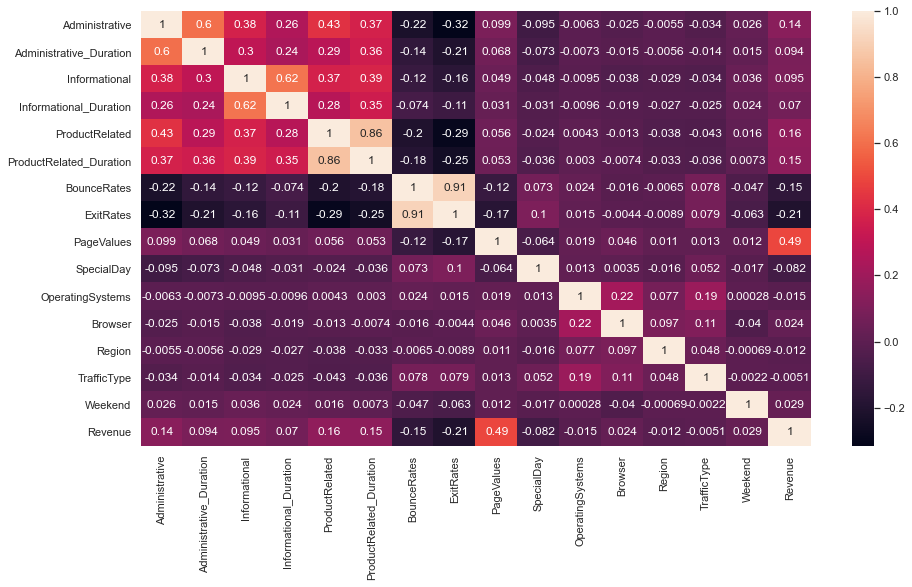

In [7]:
plt.figure(figsize = (15,8))
sns.heatmap(data_raw.corr(), annot = True)

Multicolinearity exists between some variables. We'll calculate the Variance Inflation Factor (VIF) to eliminate this problem

__Variance Inflation Factor (VIF)__ measures the degree of multicollinearity in a set of independent variables. <br>
Mathematically, it is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. <br>
_The smallest possible value for VIF is 1 (i.e., a complete absence of collinearity). As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of multicollinearity._

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data_vif = data_raw.drop(['Revenue', 'Month', 'VisitorType', 'Weekend'], axis = 1)
VIF = pd.DataFrame()
VIF['Variables'] = data_vif.columns
VIF['VIF'] = [variance_inflation_factor(data_vif.values, i) for i in range (len(data_vif.columns))]
VIF

,Variables,VIF
0,Administrative,2.793449
1,Administrative_Duration,2.043268
2,Informational,2.115489
3,Informational_Duration,1.778749
4,ProductRelated,6.503765
5,ProductRelated_Duration,6.012914
6,BounceRates,6.786104
7,ExitRates,9.793889
8,PageValues,1.134276
9,SpecialDay,1.117519


Interpreting the above table we find that "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates" have high values.
<br>
<br>
From the correlation heatmap drawn above, it's clear that the first six features are highly correlated among themselves. We'll have to drop some of the features.
"Bounce Rates" and 'Exit Rates" are highly correlated and one of them will be dropped.


In [9]:
# Assuming that the duration of time spent on each pages is more important than the number of pages, we''ll drop the variables as-
# Assuming "Bounce Rates" to be a better predictor than the "Exit Rates", we drop this variable.
data_a = data_raw.drop(['Administrative', 'Informational', 'ProductRelated', 'ExitRates'], axis = 1)
data_a.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,64.000000,0.00,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.000000,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,2.666667,0.05,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,627.500000,0.02,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<AxesSubplot:>

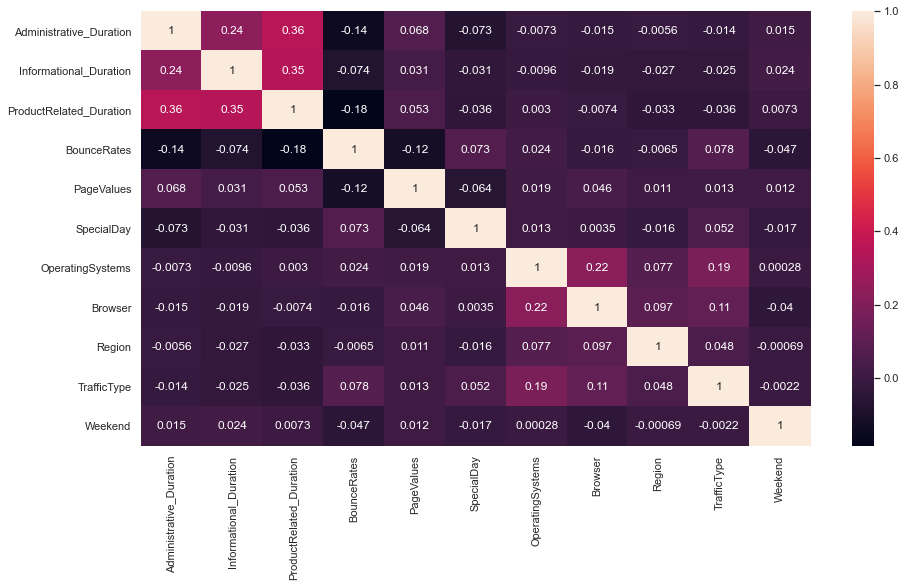

In [10]:
plt.figure(figsize = (15,8))
data_sns = data_a.drop(['Revenue'], axis = 1)
sns.heatmap(data_sns.corr(), annot= True)

In [11]:
data_vif_1 = data_a.drop(['Revenue', 'Month', 'VisitorType', 'Weekend'], axis = 1)
VIF_1 = pd.DataFrame()
VIF_1['Variables'] = data_vif_1.columns
VIF_1['VIF'] = [variance_inflation_factor(data_vif_1.values, i) for i in range (len(data_vif_1.columns))]
VIF_1

,Variables,VIF
0,Administrative_Duration,1.410633
1,Informational_Duration,1.226989
2,ProductRelated_Duration,1.713610
3,BounceRates,1.246427
4,PageValues,1.118207
5,SpecialDay,1.101508
6,OperatingSystems,4.399010
7,Browser,2.894043
8,Region,2.421095
9,TrafficType,2.083433


From the revised heatmap and VIF values, it's clear that multicollinearity is no longer a concern for our dataset.

### Dealing with categorical values

In [12]:
data_b = data_a.copy()
#Creating a checkpoint for our dataset because we're going to make some noteworthy changes.
data_b.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,64.000000,0.00,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.000000,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,2.666667,0.05,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,627.500000,0.02,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [13]:
#OneHot Encoding of 'Weekend' and 'Revenue'
data_b['Revenue'] = data_b['Revenue'].astype('int')
data_b['Weekend'] = data_b['Weekend'].astype('int')

In [14]:
#Getting dummies for the remaining two variables.
data_b = pd.get_dummies(data_b, columns = ['Month', 'VisitorType'], drop_first = True)

<br>

__Why have we made dummies for two variables but OneHot encoded the other two?__ 

<br>
 If we had obtained dummies for "Revenue", we'll get "Revenue_True" and "Revenue_False" as the two dummies. The latter is
 however, not included in the dataset for obvious reasons. Doing so would have split our target variable, and simply turning the
 Boolean values into 1 and 0 is a better option to avoid changing the overall structure of our data any more than necessary. 
 The same reasoning applies behind the OneHot Encoding of "Weekend".
 
 The "Month" and "VisitorType", on the other hand, have multiple unique values, and OneHot Encoding is not applicable to them.
 Hence, we obtain dummies.
 
 <br>


In [15]:
data_b.describe(include='all')

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,80.818611,34.472398,1194.746220,0.022191,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,...,0.014923,0.035036,0.023358,0.154663,0.272830,0.243147,0.044526,0.036334,0.006894,0.855718
std,176.779107,140.749294,1913.669288,0.048488,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,...,0.121250,0.183880,0.151043,0.361598,0.445432,0.429000,0.206268,0.187128,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,184.137500,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,7.500000,0.000000,598.936905,0.003112,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,93.256250,0.000000,1464.157214,0.016813,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3398.750000,2549.375000,63973.522230,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking for skewness

For models like Logistic Regression that are based on some assumptions; the independent variables follow some Gaussian Distribution. Hence, we attempt to eliminate Skewness to the greatest extent possible.

In [16]:
data_b.skew()

Administrative_Duration           5.615719
Informational_Duration            7.579185
ProductRelated_Duration           7.263228
BounceRates                       2.947855
PageValues                        6.382964
SpecialDay                        3.302667
OperatingSystems                  2.066285
Browser                           3.242350
Region                            0.983549
TrafficType                       1.962987
Weekend                           1.265962
Revenue                           1.909509
Month_Dec                         2.074482
Month_Feb                         8.002600
Month_Jul                         5.058083
Month_June                        6.312378
Month_Mar                         1.910367
Month_May                         1.020161
Month_Nov                         1.197644
Month_Oct                         4.417054
Month_Sep                         4.956410
VisitorType_Other                11.920585
VisitorType_Returning_Visitor    -2.024961
dtype: floa

_Values less than "-1" and greater than "1" are said to be highly skewed and negatively impact our model and its predictions.
Our dataset is highly skewed which is evident from the graphs shown below._

<ipython-input-17-54c59cc68b87>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,4))
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Figure size 720x288 with 0 Axes>

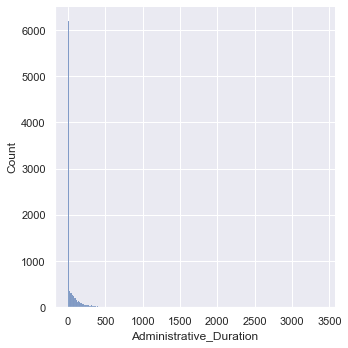

<Figure size 720x288 with 0 Axes>

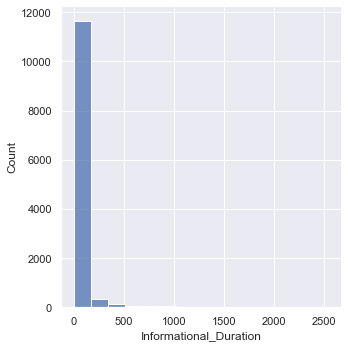

<Figure size 720x288 with 0 Axes>

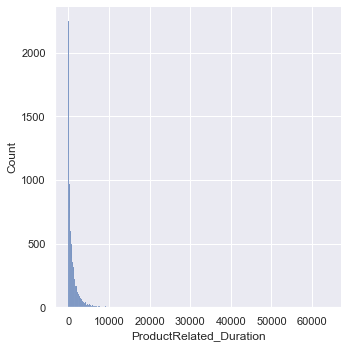

<Figure size 720x288 with 0 Axes>

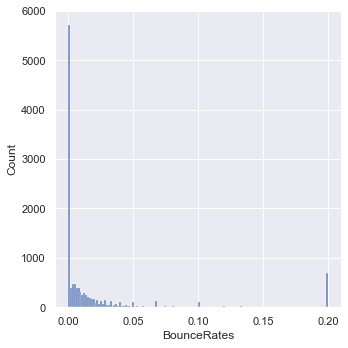

<Figure size 720x288 with 0 Axes>

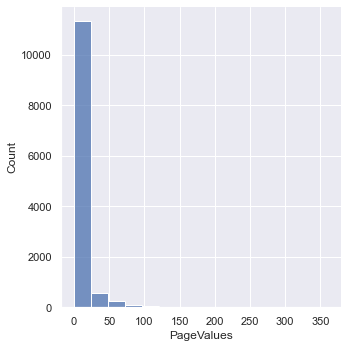

<Figure size 720x288 with 0 Axes>

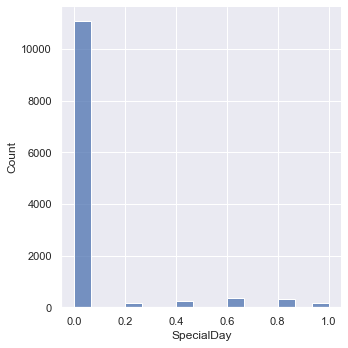

<Figure size 720x288 with 0 Axes>

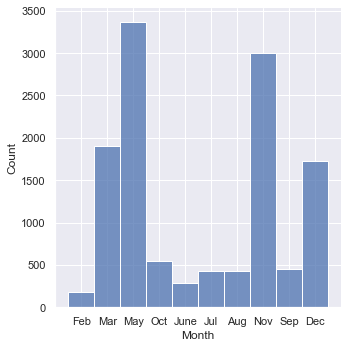

<Figure size 720x288 with 0 Axes>

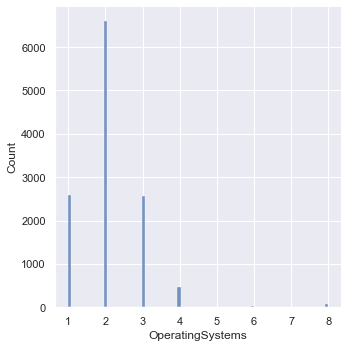

<Figure size 720x288 with 0 Axes>

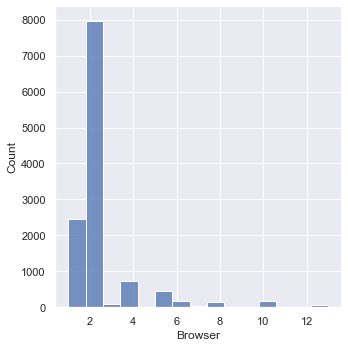

<Figure size 720x288 with 0 Axes>

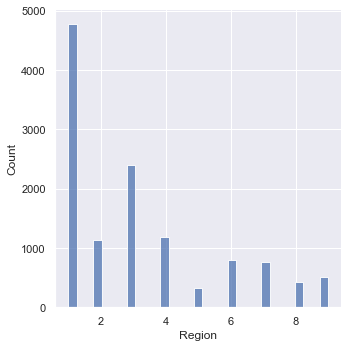

<Figure size 720x288 with 0 Axes>

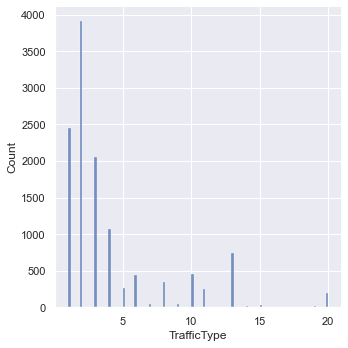

<Figure size 720x288 with 0 Axes>

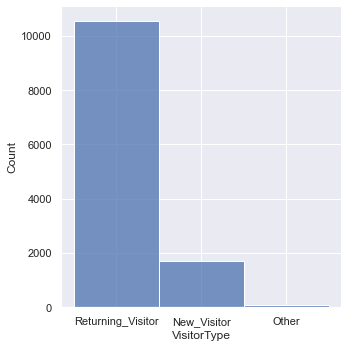

<Figure size 720x288 with 0 Axes>

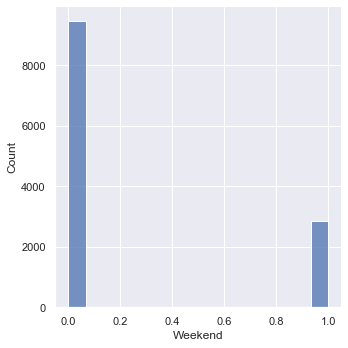

In [17]:
data_skew = data_a.drop(['Revenue'], axis = 1)
for i in data_skew.columns:
    plt.figure(figsize=(10,4))
    sns.displot(data_skew[i])
plt.show()

##### There's a lot of skewness in our data. Hence, we'll attempt to eliminate this skewness to the greatest extent possible. For this process, we use Boxcox.

The Box-Cox transform is given by:

y = _(x**lmbda - 1) / lmbda_,  __for lmbda != 0__ <br>
    _log(x_),                  __for lmbda = 0__ <br>
> Boxcox requires the input data to be positive. Sometimes a Box-Cox transformation provides a shift parameter to achieve this; Boxcox does not. Such a shift parameter is equivalent to adding a positive constant to x before calling boxcox.

In [18]:
data_c = data_b.copy()
for i in data_c.columns.drop(['Revenue']):
    data_c[i], param = stats.boxcox(data_c[i] + 2)                                

In [19]:
data_c.head(), data_c['Revenue'].unique()

(   Administrative_Duration  Informational_Duration  ProductRelated_Duration  \
 0                 0.657526                0.457155                 0.747782   
 1                 0.657526                0.457155                 6.817557   
 2                 0.657526                0.457155                 0.747782   
 3                 0.657526                0.457155                 1.827994   
 4                 0.657526                0.457155                14.008422   
 
    BounceRates  PageValues  SpecialDay  OperatingSystems   Browser    Region  \
 0     0.013974    0.392899    0.026793          0.778149  0.485010  0.737691   
 1     0.013974    0.392899    0.026793          0.903698  0.517444  0.737691   
 2     0.013974    0.392899    0.026793          1.044263  0.485010  1.084080   
 3     0.013974    0.392899    0.026793          0.985743  0.517444  0.847006   
 4     0.013974    0.392899    0.026793          0.985743  0.533402  0.737691   
 
    TrafficType  ...  Month_Fe

In [20]:
data_c.drop(['Revenue'], axis = 1).skew()

Administrative_Duration          0.181669
Informational_Duration           1.553501
ProductRelated_Duration         -0.034019
BounceRates                      0.000000
PageValues                       1.395406
SpecialDay                       0.000000
OperatingSystems                -0.018160
Browser                          0.021981
Region                           0.162711
TrafficType                      0.202965
Weekend                          1.265962
Month_Dec                        0.000000
Month_Feb                        0.000000
Month_Jul                        0.000000
Month_June                       0.000000
Month_Mar                        0.000000
Month_May                        1.020161
Month_Nov                        1.197644
Month_Oct                        0.000000
Month_Sep                        0.000000
VisitorType_Other                0.000000
VisitorType_Returning_Visitor   -2.024961
dtype: float64

### Dealing with outliers

Dealing with outliers in this problem is a bit tricky. For instance, the skewness of "VisitorType_Returning_Visitor" is high because "Returning Visitors" are more likely to end their session in shopping compared to other users, as evident from the countplot below. Removing some "Returning_Values" to bring some more symmetry to our dataset will underplay the significance of this particular category and may give an inflated false significance to the other categories.

<AxesSubplot:xlabel='Revenue', ylabel='count'>

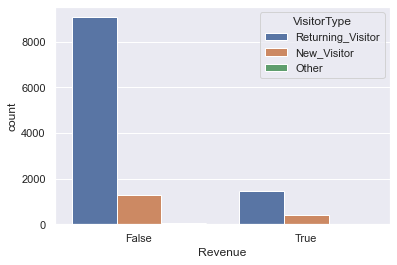

In [21]:
sns.countplot(data = data_a, x= 'Revenue', hue = 'VisitorType')

From the above argument, it makes sense to ignore the outliers to some extent as we have already adjusted the skewness.
This argument also solidifies that Gaussian Models like "Logistic Regression" will not be an ideal fit for this problem, and other models may give better results. We'll check the same when we proceed towards building models.

### Balancing The Data

There is a clear imbalance in our data. There are far more observations for "False" than there are for "True".

C:\Users\Apoorv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Revenue', ylabel='count'>

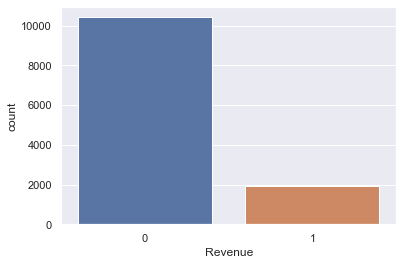

In [22]:
sns.countplot(data_c['Revenue'])

In [23]:
# Creating a copy of our unbalanced data
data_unbal = data_c.copy()

#### Clearly, our data is not balanced. We'll balance the data using the SMOTE technique.
#### First, we need to define our dependent and independent variables and perform the Train-Test Split.

In [24]:
# Defining the dependent and independent variables
y_unbal = data_unbal['Revenue']
x_unbal = data_unbal.drop(['Revenue'], axis = 1)

In [25]:
# Performing the train_test_split
from sklearn.model_selection import train_test_split
x_train_unbal, x_test_unbal, y_train_unbal, y_test_unbal = train_test_split(x_unbal, y_unbal, test_size = 0.2, random_state = 365)

### Scaling the dataset

We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points. This step is not mandatory when dealing with Tree-based algorithms.
<br>
<br>
It is debatable whether scaling or standardization should be applied on dummy variables, as these are artificial variables and don't hold much significance on their own and only indicate the presence of a specific category. 
Also, scaling these variables changes its values from the easily interpretable 0 and 1 to some other values.
For this project, we'll be scaling the dummy variables as we're more interested in making accurate predictions than data interpretation. 
Alternatively, a different method involving scaling only continuous variables can also be used.

In [26]:
#Scaling the unbalanced data
from sklearn.preprocessing import StandardScaler
sm_unbal = StandardScaler()
x_train_unbal = sm_unbal.fit_transform(x_train_unbal)
x_test_unbal = sm_unbal.transform(x_test_unbal)

__Synthetic Minority Oversampling Technique or SMOTE__ is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [27]:
#Balancing the data using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 365)
x_bal, y_bal = sm.fit_resample(x_train_unbal, y_train_unbal)

C:\Users\Apoorv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Revenue', ylabel='count'>

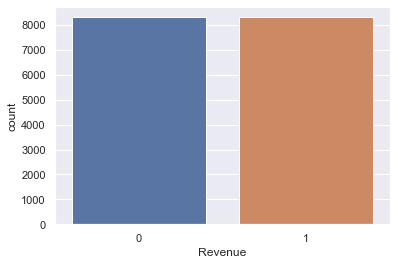

In [28]:
sns.countplot(y_bal)

C:\Users\Apoorv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Revenue', ylabel='count'>

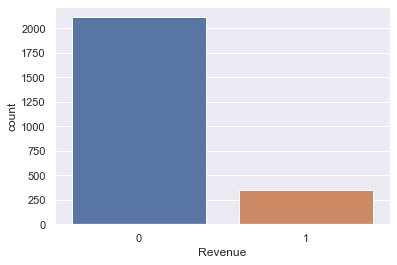

In [29]:
sns.countplot(y_test_unbal)

Our data is now balanced, and is suitable for the purposes for building models.

## Testing Models

### 1. Logistic Regression

#### Logistic Regression- Test Data Predictions (Unbalanced Data)

In [30]:
# Fitting on Unbalanced Data
from sklearn.linear_model import LogisticRegression
log_ub = LogisticRegression(random_state = 0)
log_ub.fit(x_train_unbal, y_train_unbal)
log_test_unbal = log_ub.predict(x_test_unbal)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
cm_lub = confusion_matrix(y_test_unbal, log_test_unbal)
print(cm_lub), print(classification_report(y_test_unbal, log_test_unbal))

[[2010  105]
 [ 146  205]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2115
           1       0.66      0.58      0.62       351

    accuracy                           0.90      2466
   macro avg       0.80      0.77      0.78      2466
weighted avg       0.89      0.90      0.90      2466



(None, None)

#### Logistic Regression- Test Data Predictions (Balanced Data)

In [32]:
log_b = LogisticRegression(random_state = 0)
log_b.fit(x_bal, y_bal)
log_test_bal = log_b.predict(x_test_unbal)
cm_lb = confusion_matrix(y_test_unbal, log_test_bal)
print(cm_lb), print(classification_report(y_test_unbal, log_test_bal))

[[1853  262]
 [  51  300]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2115
           1       0.53      0.85      0.66       351

    accuracy                           0.87      2466
   macro avg       0.75      0.87      0.79      2466
weighted avg       0.91      0.87      0.88      2466



(None, None)

From, the above results, we can interpret - 

For Unbalanced Data, we get an accuracy of 90%. However, accuracy alone is often a misleading measure of the quality of the model. We obtain the Confusion Matrix and the F1 Scores and find out that our model is not suitable for predicting the class "1", which is reflected in our F1_Scores (0.94 for Category 0 and a meagre 0.62 for Category 1), and the Confusion Matrix (146 Wrong and 205 Correct Predictions).

For Balanced Data, the accuracy is slightly lower at 87% but the quality of our model's predictions has increased, reflected by the 0.92 and 0.66 F1 scores for both the categories. The probability of misclassifying an observation has also reduced significantly. Category 1 has 300 correct predictions and 51 false predictions, which is a significant improvement.

HENCE, despite the reduced accuracy, the model for balanced data is more appropriate than the one made on unbalanced data.

Now, we'll check for OVERFITTING by testing the model on the train data.

#### Logistic Regression- Train Data Predictions (Unbalanced Data)

In [33]:
log_trub = LogisticRegression(random_state = 0)
log_trub.fit(x_train_unbal, y_train_unbal)
log_train_unbal = log_trub.predict(x_train_unbal)
cm_trub = confusion_matrix(y_train_unbal, log_train_unbal)
print(cm_trub), print(classification_report(y_train_unbal, log_train_unbal))

[[7894  413]
 [ 693  864]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      8307
           1       0.68      0.55      0.61      1557

    accuracy                           0.89      9864
   macro avg       0.80      0.75      0.77      9864
weighted avg       0.88      0.89      0.88      9864



(None, None)

#### Logistic Regression- Train Data Predictions (Balanced Data)

In [34]:
log_trb = LogisticRegression(random_state = 0)
log_trb.fit(x_bal, y_bal)
log_train_bal = log_trb.predict(x_train_unbal)
cm_trb = confusion_matrix(y_train_unbal, log_train_bal)
print(cm_trb), print(classification_report(y_train_unbal, log_train_bal))

[[7172 1135]
 [ 293 1264]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      8307
           1       0.53      0.81      0.64      1557

    accuracy                           0.86      9864
   macro avg       0.74      0.84      0.77      9864
weighted avg       0.89      0.86      0.87      9864



(None, None)

Similar results are seen in the train data results as well.
Comparing the test and train results, it's clear that our data is not overfitted.
Clearly, balanced data is giving better results, so, we'll only be testing the following models on the balanced data.

### 2. K-Nearest Neighbours (KNN)

#### KNN- Test Data

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_test = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_test.fit(x_bal, y_bal)
knn_tp = knn_test.predict(x_test_unbal)
cm_knn_t = confusion_matrix(y_test_unbal, knn_tp)
print(cm_knn_t), print(classification_report(y_test_unbal, knn_tp))

[[1804  311]
 [  63  288]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2115
           1       0.48      0.82      0.61       351

    accuracy                           0.85      2466
   macro avg       0.72      0.84      0.76      2466
weighted avg       0.90      0.85      0.86      2466



(None, None)

#### KNN- Train Data

In [36]:
knn_train = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_train.fit(x_bal, y_bal)
knn_trp = knn_test.predict(x_train_unbal)
cm_knn_tr = confusion_matrix(y_train_unbal, knn_trp)
print(cm_knn_tr), 
print(classification_report(y_train_unbal, knn_trp))

[[7300 1007]
 [  38 1519]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      8307
           1       0.60      0.98      0.74      1557

    accuracy                           0.89      9864
   macro avg       0.80      0.93      0.84      9864
weighted avg       0.93      0.89      0.90      9864



### 3. Support Vector Machine

#### SVM- Test Data
 We have also fitted the model with different kernels, but 'rbf' and 'linear' give the best results.

In [38]:
from sklearn.svm import SVC
svm_t = SVC(kernel = 'rbf', random_state =0)
svm_t.fit(x_bal, y_bal)
svm_tp = svm_t.predict(x_test_unbal)
cm_svmt = confusion_matrix(y_test_unbal, svm_tp)
print(cm_svmt),
print(classification_report(y_test_unbal, svm_tp))

[[1830  285]
 [  42  309]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2115
           1       0.52      0.88      0.65       351

    accuracy                           0.87      2466
   macro avg       0.75      0.87      0.79      2466
weighted avg       0.91      0.87      0.88      2466



#### SVM- Train Data

In [39]:
from sklearn.svm import SVC
svm_tr = SVC(kernel = 'rbf', random_state =0)
svm_tr.fit(x_bal, y_bal)
svm_trp = svm_tr.predict(x_train_unbal)
cm_svmtr = confusion_matrix(y_train_unbal, svm_trp)
print(cm_svmtr),
print(classification_report(y_train_unbal, svm_trp))

[[7171 1136]
 [ 219 1338]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8307
           1       0.54      0.86      0.66      1557

    accuracy                           0.86      9864
   macro avg       0.76      0.86      0.79      9864
weighted avg       0.90      0.86      0.87      9864



So far, we have obtained the best accuracy and F1 scores from the SVM Model.

### 4. Naive Bayes

#### Naive Bayes- Test Data

In [40]:
from sklearn.naive_bayes import GaussianNB
nb_t = GaussianNB()
nb_t.fit(x_bal, y_bal)
nb_tp = nb_t.predict(x_test_unbal)
cm_tp = confusion_matrix(y_test_unbal, nb_tp)
print(cm_tp),
print(classification_report(y_test_unbal, nb_tp))

[[1679  436]
 [  58  293]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      2115
           1       0.40      0.83      0.54       351

    accuracy                           0.80      2466
   macro avg       0.68      0.81      0.71      2466
weighted avg       0.89      0.80      0.82      2466



#### Naive Bayes- Train Data

In [41]:
from sklearn.naive_bayes import GaussianNB
nb_tr = GaussianNB()
nb_tr.fit(x_bal, y_bal)
nb_trp = nb_tr.predict(x_train_unbal)
cm_trp = confusion_matrix(y_train_unbal, nb_trp)
print(cm_trp),
print(classification_report(y_train_unbal, nb_trp))

[[6538 1769]
 [ 256 1301]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      8307
           1       0.42      0.84      0.56      1557

    accuracy                           0.79      9864
   macro avg       0.69      0.81      0.71      9864
weighted avg       0.88      0.79      0.82      9864



### 5. Decision Tree

#### Decision Tree- Test Data

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree_t = DecisionTreeClassifier()
tree_t.fit(x_bal, y_bal)
tree_tp = tree_t.predict(x_test_unbal)
cm_t = confusion_matrix(y_test_unbal, tree_tp)
print(cm_t),
print(classification_report(y_test_unbal, tree_tp))

[[1883  232]
 [ 130  221]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      2115
           1       0.49      0.63      0.55       351

    accuracy                           0.85      2466
   macro avg       0.71      0.76      0.73      2466
weighted avg       0.87      0.85      0.86      2466



#### Decision Tree- Train Data

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree_tr = DecisionTreeClassifier()
tree_tr.fit(x_bal, y_bal)
tree_trp = tree_tr.predict(x_train_unbal)
cm_tr = confusion_matrix(y_train_unbal, tree_trp)
print(cm_tr),
print(classification_report(y_train_unbal, tree_trp))

[[8307    0]
 [   0 1557]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8307
           1       1.00      1.00      1.00      1557

    accuracy                           1.00      9864
   macro avg       1.00      1.00      1.00      9864
weighted avg       1.00      1.00      1.00      9864



The Decision Tree is clearly overfit. To reduce this, we first apply "K-Fold Cross Validation" followed by a "Grid Search" to get the optimal values of parameters to avoid overfitting.

#### Cross Validation in Decision Tree

In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = tree_t, X = x_train_unbal, y = y_train_unbal, cv = 20)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.83 %
Standard Deviation: 1.36 %


#### Grid Search for optimal value of Decision Tree parameters

In [45]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth' : [3, 5, 7, 9, 10],  'max_leaf_nodes': [20, 30, 40, 50, 60],'min_samples_leaf': [5, 10, 15, 20, 25],
               'min_samples_split': [15, 30, 50, 60, 80]}]
grid_search = GridSearchCV(estimator = tree_t, param_grid = parameters, cv =5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(x_train_unbal, y_train_unbal)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 89.62 %
Best Parameters: {'max_depth': 9, 'max_leaf_nodes': 30, 'min_samples_leaf': 15, 'min_samples_split': 15}


In [46]:
# This is our optimized Decision Tree
tree_opt = DecisionTreeClassifier(max_depth= 9, max_leaf_nodes= 30, min_samples_leaf= 15, min_samples_split= 15)

In [47]:
tree_opt.fit(x_bal, y_bal)
tree_test = tree_opt.predict(x_test_unbal)
print(classification_report(y_test_unbal,tree_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      2115
           1       0.52      0.88      0.65       351

    accuracy                           0.87      2466
   macro avg       0.75      0.87      0.78      2466
weighted avg       0.91      0.87      0.88      2466



In [48]:
tree_train = tree_opt.predict(x_train_unbal)
print(classification_report(y_train_unbal,tree_train))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8307
           1       0.53      0.86      0.66      1557

    accuracy                           0.86      9864
   macro avg       0.75      0.86      0.78      9864
weighted avg       0.90      0.86      0.87      9864



This model is clearly not overfit and has provided good results.


### 6. Random Forest

#### Random Forest- Test Data

We have used the parameters of the Decision Tree model as the optimal values for the same are already calculated earlier.

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_t = RandomForestClassifier(max_depth = 9,  max_leaf_nodes =  30, min_samples_leaf=  15,
               min_samples_split =  15, n_estimators = 20, criterion = 'entropy', random_state = 0)
rf_t.fit(x_bal, y_bal)
rf_test = rf_t.predict(x_test_unbal)
print(classification_report(y_test_unbal, rf_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2115
           1       0.51      0.86      0.64       351

    accuracy                           0.86      2466
   macro avg       0.74      0.86      0.78      2466
weighted avg       0.91      0.86      0.87      2466



#### Random Forest- Train Data

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_tr = RandomForestClassifier(max_depth = 9,  max_leaf_nodes =  30, min_samples_leaf=  15,
               min_samples_split =  15, n_estimators = 20, criterion = 'entropy', random_state = 0)
rf_tr.fit(x_bal, y_bal)
rf_train = rf_tr.predict(x_test_unbal)
print(classification_report(y_test_unbal, rf_train))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2115
           1       0.51      0.86      0.64       351

    accuracy                           0.86      2466
   macro avg       0.74      0.86      0.78      2466
weighted avg       0.91      0.86      0.87      2466



### 7. Artificial Neural Networks (ANN)

In [51]:
import tensorflow as tf

In [52]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(x_bal, y_bal, batch_size = 32, epochs = 100)

Epoch 1/100
520/520 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7768: 0s - loss: 0.5895 - accura
Epoch 2/100
520/520 [==============================] - ETA: 0s - loss: 0.4464 - accuracy: 0.8471 ETA: 0s - loss: 0.4475 - accuracy - 1s 1ms/step - loss: 0.4454 - accuracy: 0.8466
Epoch 3/100
520/520 [==============================] - 1s 1ms/step - loss: 0.4095 - accuracy: 0.8490: 0s - loss: 0.4109 - accuracy: 0.86 - ETA: 0s - loss: 0.410
Epoch 4/100
520/520 [==============================] - 1s 1ms/step - loss: 0.3876 - accuracy: 0.8518: 0s - loss: 0.383
Epoch 5/100
520/520 [==============================] - 1s 1ms/step - loss: 0.3748 - accuracy: 0.8533: 0s - loss: 0.377
Epoch 6/100
520/520 [==============================] - 1s 1ms/step - loss: 0.3650 - accuracy: 0.8554: 0s - loss: 0.3628 - accuracy: 0.
Epoch 7/100
520/520 [==============================] - 1s 1ms/step - loss: 0.3581 - accuracy: 0.8556: 0s - loss: 0.3
Epoch 8/100
520/520 [====================

520/520 [==============================] - 1s 1ms/step - loss: 0.3121 - accuracy: 0.8649: 0s - loss: 0.3076 - accuracy: 0. - ETA: 0s - loss: 0.3070 - ac - ETA: 0s - loss: 0.3146 - accuracy: 0.
Epoch 61/100
520/520 [==============================] - 1s 1ms/step - loss: 0.3120 - accuracy: 0.8648: 0s - loss: 0.3121 - accuracy: 0.86
Epoch 62/100
520/520 [==============================] - 1s 1ms/step - loss: 0.3115 - accuracy: 0.8652
Epoch 63/100
520/520 [==============================] - 1s 1ms/step - loss: 0.3113 - accuracy: 0.8646: 0s - loss: 0.3117 
Epoch 64/100
520/520 [==============================] - 1s 1ms/step - loss: 0.3109 - accuracy: 0.8652: 0s - loss: 0.3174 - accu - ETA: 0s - loss: 0.3110 - accuracy: 0.86
Epoch 65/100
520/520 [==============================] - 1s 1ms/step - loss: 0.3115 - accuracy: 0.8652
Epoch 66/100
520/520 [==============================] - 1s 1ms/step - loss: 0.3113 - accuracy: 0.8655: 0s - loss: 0.3088 - accu
Epoch 67/100
520/520 [=======================

In [53]:
ann_test = ann.predict(x_test_unbal)
ann_test = (ann_test > 0.5)
print(classification_report(y_test_unbal,ann_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2115
           1       0.50      0.85      0.63       351

    accuracy                           0.86      2466
   macro avg       0.73      0.85      0.77      2466
weighted avg       0.90      0.86      0.87      2466



In [54]:
ann_train = ann.predict(x_train_unbal)
ann_train = (ann_train > 0.5)
print(classification_report(y_train_unbal,ann_train))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8307
           1       0.54      0.85      0.66      1557

    accuracy                           0.86      9864
   macro avg       0.75      0.86      0.79      9864
weighted avg       0.90      0.86      0.87      9864



### 8. XG Boost

In [55]:
from xgboost import XGBClassifier
xg_t = XGBClassifier(n_estimators = 30, n_jobs = -1, max_depth = 5)
xg_t.fit(x_bal, y_bal)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=30,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### Test Data

In [56]:
xg_test = xg_t.predict(x_test_unbal)
print(classification_report(y_test_unbal, xg_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2115
           1       0.61      0.77      0.68       351

    accuracy                           0.90      2466
   macro avg       0.78      0.84      0.81      2466
weighted avg       0.91      0.90      0.90      2466



#### Train Data

In [57]:
xg_train = xg_t.predict(x_train_unbal)
print(classification_report(y_train_unbal, xg_train))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8307
           1       0.67      0.78      0.72      1557

    accuracy                           0.91      9864
   macro avg       0.82      0.86      0.83      9864
weighted avg       0.91      0.91      0.91      9864



## Results

In [63]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
Summary = pd.DataFrame()

In [84]:
Summary['Model'] = ['Logistic Regression', 'Logistic Regression', 'KNN', 'KNN', 'SVM', 'SVM', 'NaiveBayes', 'NaiveBayes', 'OptDecisionTree', 'OptDecisionTree', 'RandomForest', 'RandomForest', 'ANN', 'ANN', 'XGBoost', 'XGBoost']
Summary['Dataset'] = ['Test_Data', 'Training_Data', 'Test_Data', 'Training_Data', 'Test_Data', 'Training_Data', 'Test_Data', 'Training_Data', 'Test_Data', 'Training_Data', 'Test_Data', 'Training_Data', 'Test_Data', 'Training_Data', 'Test_Data', 'Training_Data']
Summary['Accuracy'] = accuracy_score(y_test_unbal, log_test_bal), accuracy_score(y_train_unbal, log_train_bal), accuracy_score(y_test_unbal, knn_tp), accuracy_score(y_train_unbal, knn_trp), accuracy_score(y_test_unbal, svm_tp), accuracy_score(y_train_unbal, svm_trp), accuracy_score(y_test_unbal, nb_tp), accuracy_score(y_train_unbal, nb_trp), accuracy_score(y_test_unbal,tree_test), accuracy_score(y_train_unbal,tree_train), accuracy_score(y_test_unbal, rf_test), accuracy_score(y_test_unbal, rf_train), accuracy_score(y_test_unbal,ann_test), accuracy_score(y_train_unbal,ann_train), accuracy_score(y_test_unbal, xg_test), accuracy_score(y_train_unbal, xg_train)
Summary['F1 Score'] = f1_score(y_test_unbal, log_test_bal), f1_score(y_train_unbal, log_train_bal), f1_score(y_test_unbal, knn_tp), f1_score(y_train_unbal, knn_trp), f1_score(y_test_unbal, svm_tp), f1_score(y_train_unbal, svm_trp), f1_score(y_test_unbal, nb_tp), f1_score(y_train_unbal, nb_trp), f1_score(y_test_unbal,tree_test), f1_score(y_train_unbal,tree_train), f1_score(y_test_unbal, rf_test), f1_score(y_test_unbal, rf_train), f1_score(y_test_unbal,ann_test), f1_score(y_train_unbal,ann_train), f1_score(y_test_unbal, xg_test), f1_score(y_train_unbal, xg_train)
Summary['Precision'] = precision_score(y_test_unbal, log_test_bal), precision_score(y_train_unbal, log_train_bal), precision_score(y_test_unbal, knn_tp), precision_score(y_train_unbal, knn_trp), precision_score(y_test_unbal, svm_tp), precision_score(y_train_unbal, svm_trp), precision_score(y_test_unbal, nb_tp), precision_score(y_train_unbal, nb_trp), precision_score(y_test_unbal,tree_test), precision_score(y_train_unbal,tree_train), precision_score(y_test_unbal, rf_test), precision_score(y_test_unbal, rf_train), precision_score(y_test_unbal,ann_test), precision_score(y_train_unbal,ann_train), precision_score(y_test_unbal, xg_test), precision_score(y_train_unbal, xg_train)
Summary['Recall'] = recall_score(y_test_unbal, log_test_bal), recall_score(y_train_unbal, log_train_bal), recall_score(y_test_unbal, knn_tp), recall_score(y_train_unbal, knn_trp), recall_score(y_test_unbal, svm_tp), recall_score(y_train_unbal, svm_trp), recall_score(y_test_unbal, nb_tp), recall_score(y_train_unbal, nb_trp), recall_score(y_test_unbal,tree_test), recall_score(y_train_unbal,tree_train), recall_score(y_test_unbal, rf_test), recall_score(y_test_unbal, rf_train), recall_score(y_test_unbal,ann_test), recall_score(y_train_unbal,ann_train), recall_score(y_test_unbal, xg_test), recall_score(y_train_unbal, xg_train) 

In [85]:
Summary

,Model,Dataset,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,Test_Data,0.873074,0.657174,0.533808,0.854701
1,Logistic Regression,Training_Data,0.855231,0.639029,0.526886,0.811818
2,KNN,Test_Data,0.848337,0.606316,0.480801,0.820513
3,KNN,Training_Data,0.894059,0.744061,0.601346,0.975594
4,SVM,Test_Data,0.867397,0.653968,0.520202,0.880342
5,SVM,Training_Data,0.862632,0.663855,0.540825,0.859345
6,NaiveBayes,Test_Data,0.799676,0.542593,0.401920,0.834758
7,NaiveBayes,Training_Data,0.794708,0.562351,0.423779,0.835581
8,OptDecisionTree,Test_Data,0.865369,0.650526,0.515860,0.880342
9,OptDecisionTree,Training_Data,0.858881,0.658489,0.532751,0.861914


The above table provides the results of different kinds of models in detail. 
Based on the nature of the problem at hand, any of the following models can be used.
__The optimised Decision Tree, Logistic Regression and XG Boost give the best accuracies along with the best F1 Scores__

When a new dataset is brought in for prediction, the following preprocessing steps must be applied before any of the above specified models can be used on this new dataset.
> * The columns dropped to eliminate multicollinearity must be removed from the new data as they don't exist in training data.
> * The variable "Weekend" must be OneHot Encoded. The variable "Revenue" is to be predicted.
> * Dummies for the variables "VisitorType", "Month" must be obtained.
> * The values must be adjusted for skewness using Boxcox as done earlier.
> * The values must be scaled using "transform" only with the same scaler used on train data.
> * The order of columns of the new data being fed to the model must be same as that of the train data. 

## EDA

EDA is done on the untampered original dataset. Balancing, Scaling, etc. are only used to create better models.

In [86]:
raw_data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

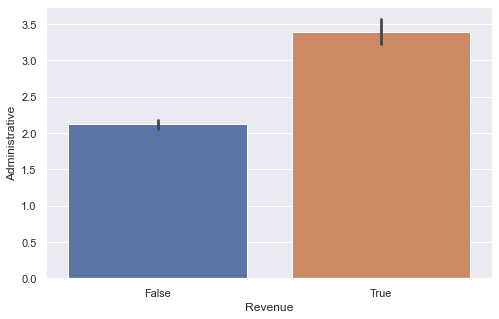

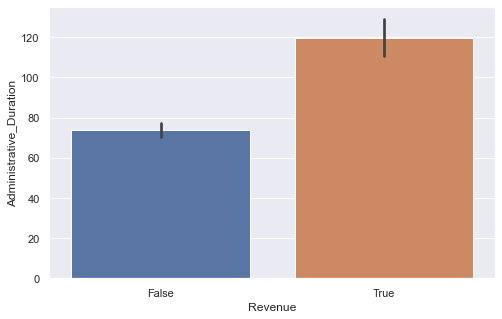

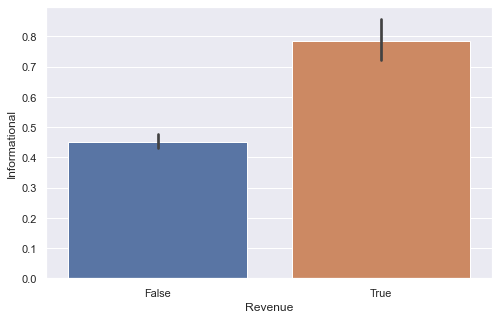

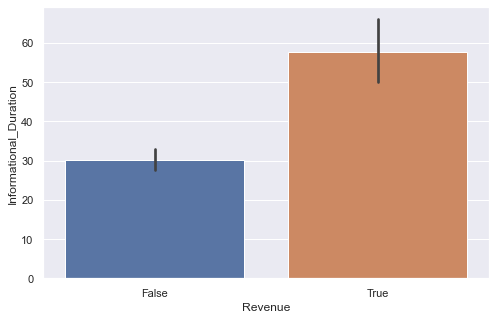

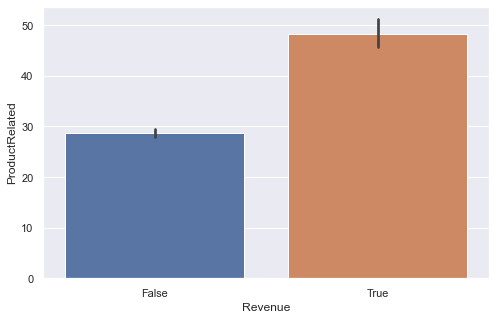

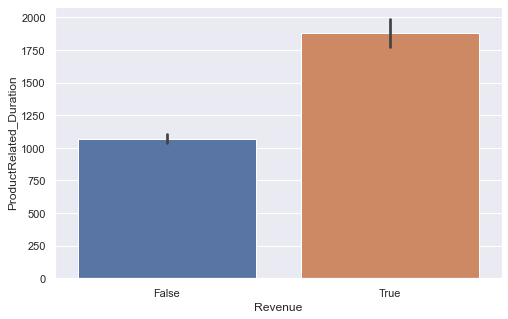

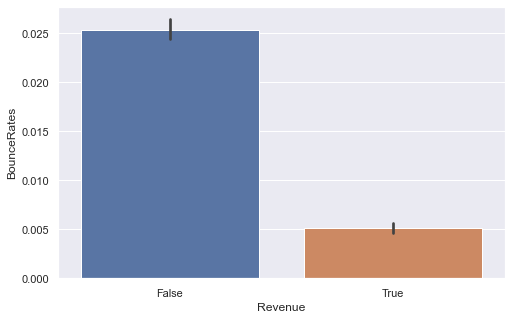

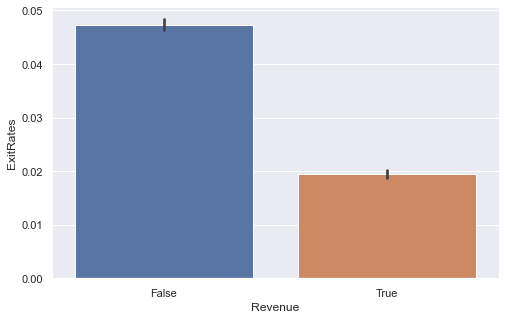

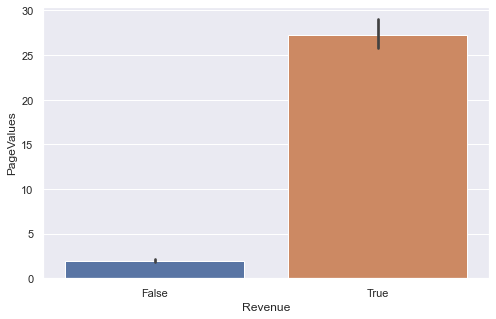

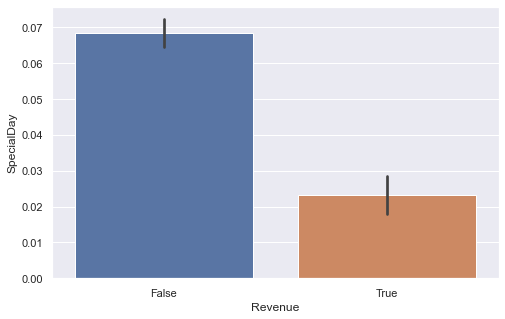

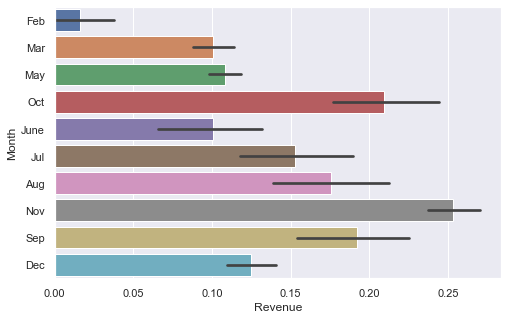

In [87]:
for i in raw_data.columns.drop(['Revenue', 'Weekend', 'OperatingSystems', 'Browser', 'Region', "TrafficType", 'VisitorType']):
    plt.figure(figsize = (8,5))
    sns.barplot(y = raw_data[i], x = "Revenue", data = raw_data)

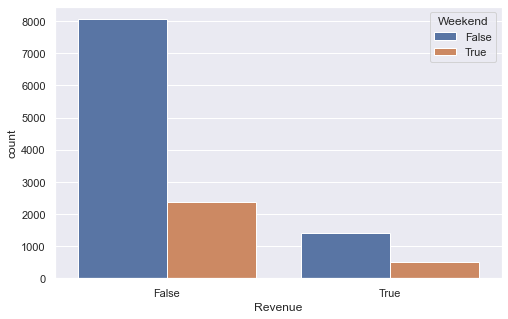

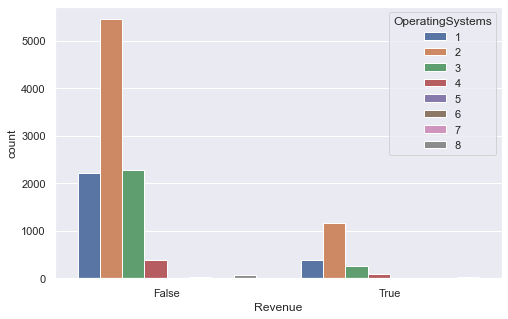

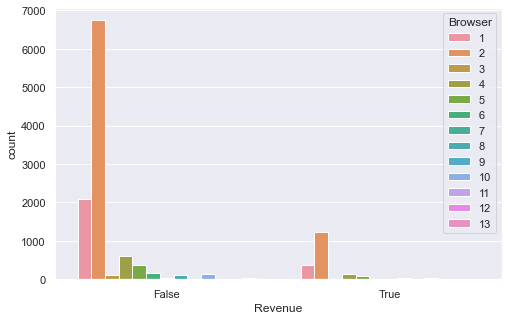

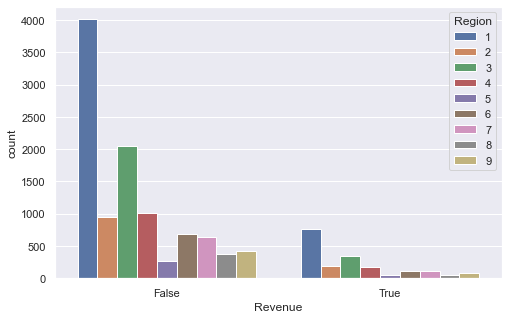

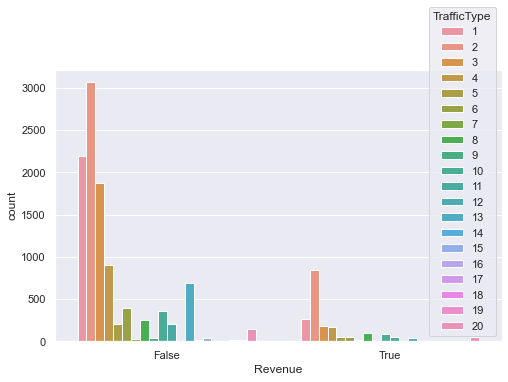

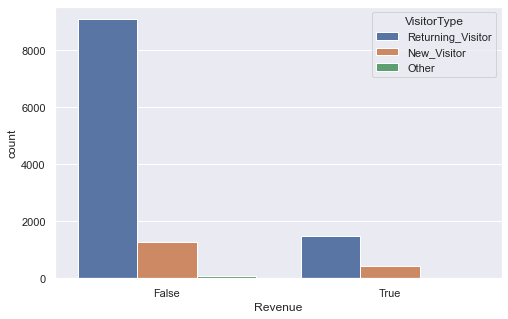

In [88]:
for i in raw_data[['Weekend', 'OperatingSystems', 'Browser', 'Region', "TrafficType", 'VisitorType']]:
    plt.figure(figsize = (8,5))
    sns.countplot(x = 'Revenue', hue = i, data = raw_data)

Further EDA can be done and several types of charts, tables and graphs can be obtained depending upon the type and nature of data interpretation required in the problem.